In [93]:
# Instalação das bibliotecas não nativas
!pip install requests --quiet
!pip install beautifulsoup4 --quiet
!pip install pandas --quiet
!pip install matplotlib --quiet
!pip install ipython --quiet

In [94]:
# Importação das bibliotecas
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
from IPython.core.display import Markdown

<h1 style="color:lightblue">Questão 1:</h1>

In [96]:
url = 'https://www.reddit.com/r/programming/'
headers = {'user-agent': 'Mozilla/5.0'}
response = requests.get(url=url, headers=headers)

html_content = response.text
soup = BeautifulSoup(html_content, 'html.parser')

post_div = soup.find_all('shreddit-post', {'subreddit-prefixed-name': "r/programming"})
post_data_list = []

for i in range(3):
    title_element = post_div[i].get('post-title')
    up_votes_element = post_div[i].get('score')
    link_element = post_div[i].get('content-href')
    post_dict = {
        'Título': title_element,
        'Up Votes': up_votes_element if up_votes_element != None else 0,
        'Link': link_element
    }
    post_data_list.append(post_dict)
    
reddit_df = pd.DataFrame(post_data_list)
reddit_df.to_csv('Graficos&Dados/dados_reddit.csv')
reddit_df

,Título,Up Votes,Link
0,Most bosses regret how they mandated workers r...,232,https://fortune.com/2023/08/14/bosses-regretti...
1,ChatGPT Isn't as Good at Coding as We Thought,139,https://www.pcmag.com/news/chatgpt-isnt-good-a...
2,How They Bypass YouTube Video Download Throttling,518,https://blog.0x7d0.dev/history/how-they-bypass...


<h1 style="color:lightblue">Questão 2:</h1>

In [97]:
filmes = [
{"titulo": "O Senhor dos Anéis", "ano": 2001, "avaliacao": 8.8},
{"titulo": "Matrix", "ano": 1999, "avaliacao": 9.3},
{"titulo": "Interestelar", "ano": 2014, "avaliacao": 8.6}
]

movies_df = pd.DataFrame(filmes)

average_rating = movies_df['avaliacao'].mean()
best_movie = movies_df.loc[movies_df['avaliacao'] == movies_df['avaliacao'].max(), 'titulo'].values[0]
worst_movie_year = movies_df.loc[movies_df['avaliacao'] == movies_df['avaliacao'].min(), 'ano'].values[0]

movies_analysis_df = pd.DataFrame({
    'Média das Avaliações': [average_rating],
    'Melhor Filme': [best_movie],
    'Ano do pior Flme': [worst_movie_year]
})

movies_analysis_df

,Média das Avaliações,Melhor Filme,Ano do pior Flme
0,8.9,Matrix,2014


<h1 style="color:lightblue">Questão 3:</h1>

In [115]:
def convertToCurrency(value):
    return "R$ {:,.2f}".format(value).replace(".", ",")

In [116]:
# Exploração dos dados

purchase_df = pd.read_json('dados_compras.json')

purchase_quantity, total_value = purchase_df['Valor'].agg(['count', 'sum'])

values_calculations_df = pd.DataFrame(
    {   
        'Quantidade total de Compras': [purchase_quantity],
        'Valor Total em compras': [convertToCurrency(total_value)],
        'Média de valor por venda': [convertToCurrency(total_value / purchase_quantity)]
    }
)

display(
    Markdown('### Demonstração das primeiras linhas do conjunto de dados:'),
    purchase_df.head(),
    Markdown('### Verificação de dados vazios nas colunas:'),
    purchase_df.isna().sum(),
    Markdown('### Análise Geral:'),
    values_calculations_df
)

### Demonstração das primeiras linhas do conjunto de dados:

,Login,Idade,Sexo,Item ID,Nome do Item,Valor
0,Aelalis34,38,Masculino,165,Bone Crushing Silver Skewer,3.37
1,Eolo46,21,Masculino,119,"Stormbringer, Dark Blade of Ending Misery",2.32
2,Assastnya25,34,Masculino,174,Primitive Blade,2.46
3,Pheusrical25,21,Masculino,92,Final Critic,1.36
4,Aela59,23,Masculino,63,Stormfury Mace,1.27


### Verificação de dados vazios nas colunas:

Login           0
Idade           0
Sexo            0
Item ID         0
Nome do Item    0
Valor           0
dtype: int64

### Análise Geral:

,Quantidade total de Compras,Valor Total em compras,Média de valor por venda
0,780.0,"R$ 2,286,33","R$ 2,93"


In [118]:
# Análise de Compras

function_results = purchase_df['Valor'].agg(['mean', 'min', 'max','median']) # Calcula a média, o mínimo e o máximo pago em compras

basic_calculations_df = pd.DataFrame({      
    'Média': [convertToCurrency(function_results[0])],
    'Mínimo': [convertToCurrency(function_results[1])],
    'Máximo': [convertToCurrency(function_results[2])],
    'Mediana': [convertToCurrency(function_results[3])]
})

expensiver_product = purchase_df.loc[purchase_df['Valor'] == function_results[2]]
# Armazenando dados sobre o produto mais caro em um Data Frame
expensiver_product_df = expensiver_product.groupby('Nome do Item').size().reset_index(name='Vendas')
expensiver_product_df['Valor'] = convertToCurrency(function_results[2])
expensiver_product_df['Faturamento'] = (expensiver_product_df['Vendas'] * function_results[2]).apply(convertToCurrency)

cheaper_product = purchase_df.loc[purchase_df['Valor'] == function_results[1]]
# Armazenando dados sobre o produto mais barato em um Data Frame
cheaper_product_df = cheaper_product.groupby('Nome do Item').size().reset_index(name='Vendas')
cheaper_product_df['Valor'] = convertToCurrency(function_results[1])
cheaper_product_df['Faturamento'] = (cheaper_product_df['Vendas'] * function_results[1]).apply(convertToCurrency)

display(
    Markdown('### Cálculos básicos:'),
    basic_calculations_df,
    Markdown('### Produto mais caro:'),
    expensiver_product_df,
    Markdown('### Produtos mais baratos:'),
    cheaper_product_df
)

### Cálculos básicos:

,Média,Mínimo,Máximo,Mediana
0,"R$ 2,93","R$ 1,03","R$ 4,95","R$ 2,88"


### Produto mais caro:

,Nome do Item,Vendas,Valor,Faturamento
0,Orenmir,6,"R$ 4,95","R$ 29,70"


### Produtos mais baratos:

,Nome do Item,Vendas,Valor,Faturamento
0,Hero Cane,4,"R$ 1,03","R$ 4,12"
1,Singed Onyx Warscythe,5,"R$ 1,03","R$ 5,15"
2,Soul Infused Crystal,6,"R$ 1,03","R$ 6,18"


In [119]:
# Segmentação por sexo

gender_purchase_quantity_df = purchase_df.groupby('Sexo').size().reset_index(name = 'Compras')
gender_purchase_quantity_df.sort_values('Compras', ascending= False, inplace=True)

proportion = gender_purchase_quantity_df['Compras']/ total_value

gender_purchase_quantity_df['Percentual'] = proportion / proportion.sum() * 100
gender_purchase_quantity_df['Percentual'] = gender_purchase_quantity_df['Percentual'].map("{:,.1f}%".format)

    # Calcular valor total gasto por gênero
gender_spent_amount_df = purchase_df.groupby('Sexo').agg(
    Compras=('Sexo', 'size'),  
    Valor_Total=('Valor', 'sum')
).reset_index()

gender_spent_amount_df.sort_values(by = 'Valor_Total', ascending= False, inplace=True)
formated_gender_spent_df = gender_spent_amount_df.copy()
formated_gender_spent_df['Valor_Total'] = formated_gender_spent_df['Valor_Total'].map(convertToCurrency)

display(
    Markdown('### Compras feitas por gênero'),
    gender_purchase_quantity_df,
    Markdown('### Valor total gasto por gênero'),
    formated_gender_spent_df
)

### Compras feitas por gênero

,Sexo,Compras,Percentual
1,Masculino,633,81.2%
0,Feminino,136,17.4%
2,Outro / Não Divulgado,11,1.4%


### Valor total gasto por gênero

,Sexo,Compras,Valor_Total
1,Masculino,633,"R$ 1,867,68"
0,Feminino,136,"R$ 382,91"
2,Outro / Não Divulgado,11,"R$ 35,74"


In [103]:
# Lista de cores que será utilizada para os gráficos
color_list = ['lightblue', 'lightcoral', 'lightgreen', 'lightsteelblue', 'lightpink']

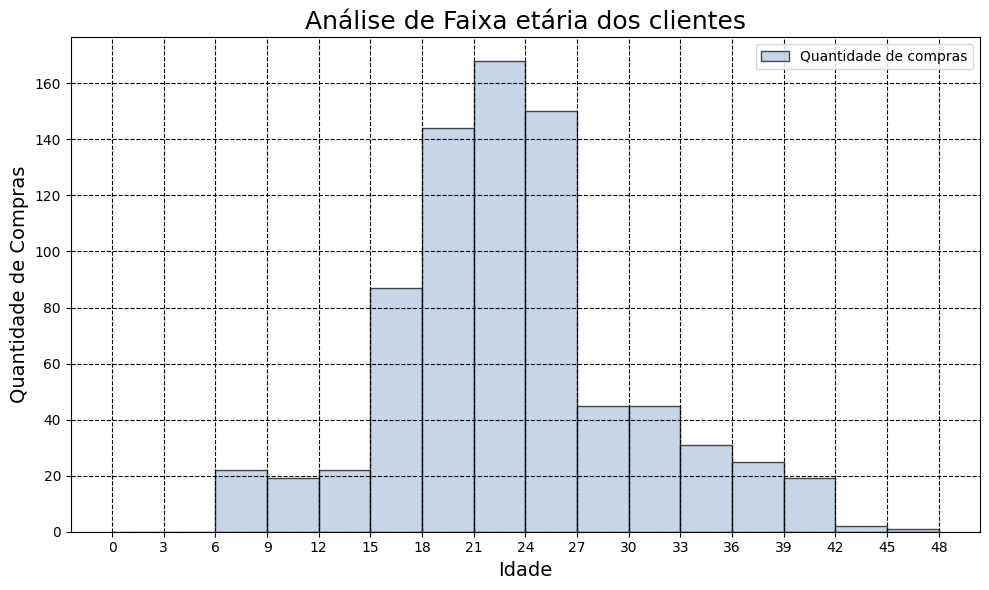

In [109]:
bins = range(0, max(purchase_df['Idade']) + 4, 3)

# Criando o histograma
plt.figure(figsize=(10, 6))
plt.hist(
    purchase_df['Idade'],
    bins=bins,
    edgecolor='black',
    alpha=0.7,
    color = color_list[3]
)

plt.xlabel('Idade', fontdict={'size': 14})
plt.ylabel('Quantidade de Compras', fontdict={'size': 14})
plt.xticks(bins)

plt.title('Análise de Faixa Etária dos clientes', fontdict={'size': 18})
plt.legend(['Quantidade de compras'])
plt.grid(linestyle = '--', color = 'black')
plt.xticks(bins)

plt.tight_layout()
plt.savefig('Graficos&Dados/1 - Faixa Etária dos clientess')
plt.show()

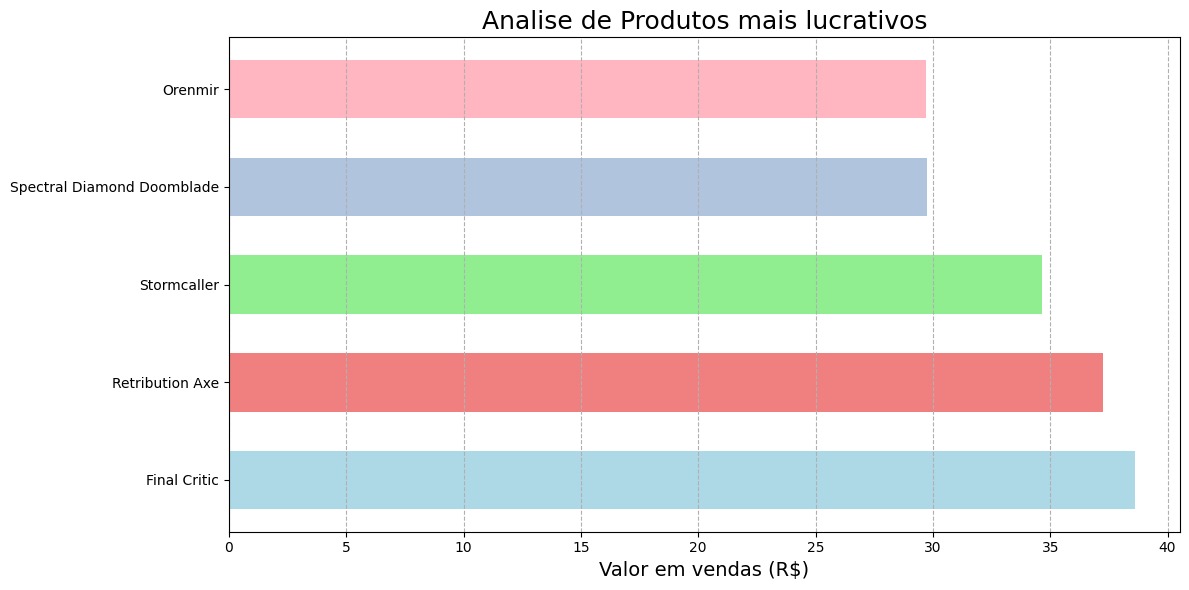

In [113]:

item_purchase_df = purchase_df.groupby('Nome do Item').agg(
    Vendas = ('Nome do Item', 'size'),
    Valor = ('Valor', 'mean')
)

item_purchase_df['Rendimento'] = item_purchase_df['Vendas'] * item_purchase_df['Valor']
item_purchase_df.sort_values('Rendimento', ascending=False, inplace=True)
item_name = item_purchase_df.index
item_gain = item_purchase_df['Rendimento']

plt.figure(figsize=(12, 6))

plt.barh(
    y=item_name[0:5],
    width=item_gain[0:5],
    color = color_list,
    height=0.6
)

plt.xlabel('Valor em vendas (R$)', fontdict={'size': 14})
plt.grid(linestyle = '--', axis = 'x')

plt.title(
    'Analise de Produtos mais lucrativos',
    loc = 'center',
    fontdict= {'size': 18}
)

plt.tight_layout()
plt.savefig('Graficos&Dados/2 - Produtos mais lucrativos')
plt.show()

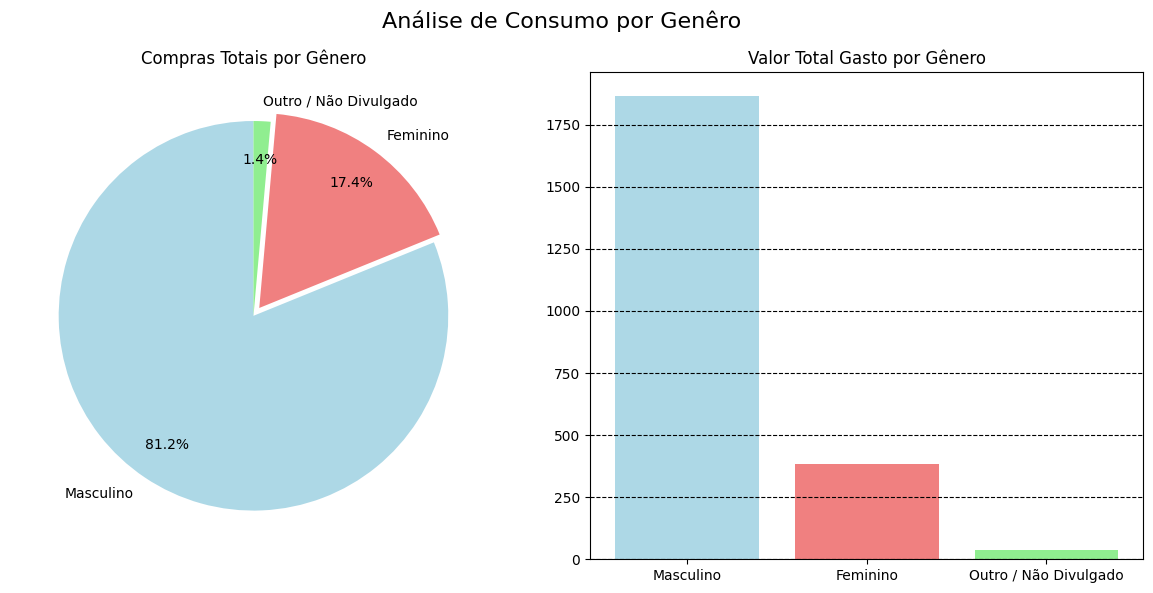

In [114]:
labels = gender_purchase_quantity_df['Sexo']
purchase_counts = gender_purchase_quantity_df['Compras']
total_spent = gender_spent_amount_df['Valor_Total']

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6)) # Figura com dois subplots lado a lado

# Gráfico de pizza para compras totais por gênero
axes[0].pie(
    purchase_counts,
    labels = labels,
    autopct='%1.1f%%',
    shadow=False,
    startangle=90,
    colors=['lightblue', 'lightcoral', 'lightgreen'],
    pctdistance=0.8,
    explode=[0, 0.05, 0]
)
axes[0].set_title('Compras Totais por Gênero')

# Gráfico de barra para valor total gasto por gênero
axes[1].bar(
    labels,
    total_spent,
    color=['lightblue', 'lightcoral', 'lightgreen'],
)
axes[1].set_title('Valor Total Gasto por Gênero')
axes[1].yaxis.grid(linestyle = '--', color = 'black')

fig.suptitle('Análise de Consumo por Genêro', fontsize=16)
plt.tight_layout()
plt.savefig('Graficos&Dados/3 - Consumo por Genêro', dpi=300)
plt.show()